In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('max_rows',3000)
pd.set_option('max_columns',255)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [21]:
def ts_labeling(raw_df,label):
    
    # Preprocessing Raw Data Frame
    avg_df = pd.DataFrame(raw_df[[c for c in raw_df.columns if 'Time' not in c]].T.mean(),columns = ['f0'])
    avg_df = raw_df[['Time (seconds)']].merge(avg_df ,left_index=True,right_index=True,how='left')
    avg_df.columns = ['time','f0']
    df = avg_df.copy()
    
    # Plotting Graph for reference
    plt.figure(figsize = (80,10))
    sns.lineplot(df.time,df.f0)
    plt.xticks(np.arange(0,df.time.max(),.2))
    plt.show()
    
    # Adding feature for peak identification
    df['n1'] = abs(df['f0'] - df['f0'].shift(5))
    
    # Roughly estimating peaks by flagging
    df['f'] = np.where(df.n1 > df.n1.quantile(.9),1, 0)
    df['f'] = np.where(df.f0 > df.f0.quantile(.9),1, df.f)
    
    # Defining Result structure and variables used in for loop for labeling
    result = pd.DataFrame(columns = ['Time(Seconds)','Length(Seconds)','Label(string)'])
    n = -1
    start = 0
    end = 0
    
    # Looping over index
    for x in df.index:
        
        # omitting first 5 and last 5 indexes assuming peaks are not in the beginning and smaller than 5 timeblocks
        if (x > 5) & (x < df.index.max()-5):
            
            # Identifying peak start
            if (df.loc[x,'f'] == 1) & (sum([df.loc[x-i-1,'f'] for i in range(5)]) == 0):
                n = n + 1
                start = df.loc[x-1,'time']
            
            # Identifying peak ends
            elif (df.loc[x,'f'] == 1) & (sum([df.loc[x+i+1,'f'] for i in range(5)]) == 0):
                end = df.loc[x+1,'time']

        # omitting smaller peaks
        if (end - start) > .3:
            result.loc[n,'Time(Seconds)'] = start
            result.loc[n,'Length(Seconds)'] = end - start
    
    # Consolidating and labeling flagged peaks
    result.reset_index(drop=True,inplace = True)
    result['Label(string)'] = label
    return result

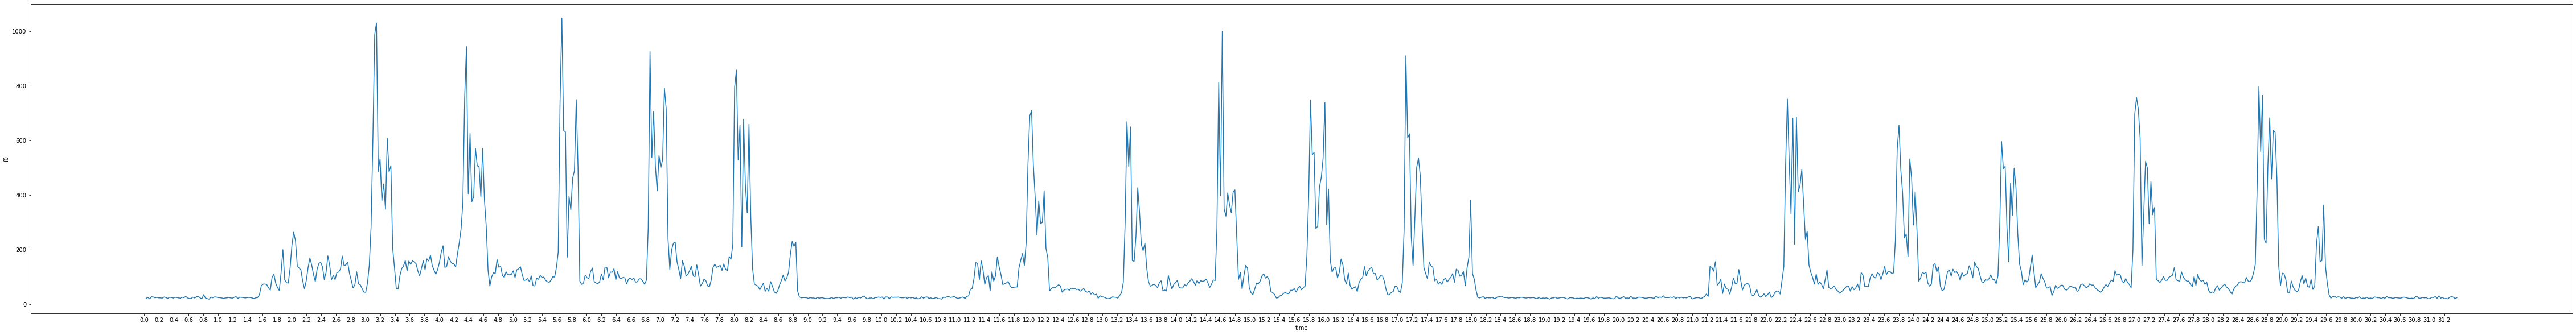

,Time(Seconds),Length(Seconds),Label(string)
0,3.07662,0.41502,action_1
1,4.29726,0.439433,action_1
2,5.61556,0.41502,action_1
3,6.83621,0.390607,action_1
4,7.98361,0.366194,action_1
5,11.9629,0.390607,action_1
6,13.3056,0.317368,action_1
7,14.5507,0.390607,action_1
8,15.7713,0.439433,action_1
9,17.0896,0.366194,action_1


In [22]:
a1_raw = pd.read_csv('action_1_signal_raw.data')
ts_labeling(raw_df=a1_raw , label='action_1')

In [23]:
pd.read_csv('action_1_labels.label')

,Time(Seconds),Length(Seconds),Label(string)
0,2.986523,0.401533,action_1
1,4.245780,0.449030,action_1
2,5.575621,0.399287,action_1
3,6.805614,0.376089,action_1
4,7.936644,0.347965,action_1
5,11.898954,0.402664,action_1
6,13.258043,0.354764,action_1
7,14.503102,0.376089,action_1
8,15.737963,0.383506,action_1
9,17.052243,0.337768,action_1


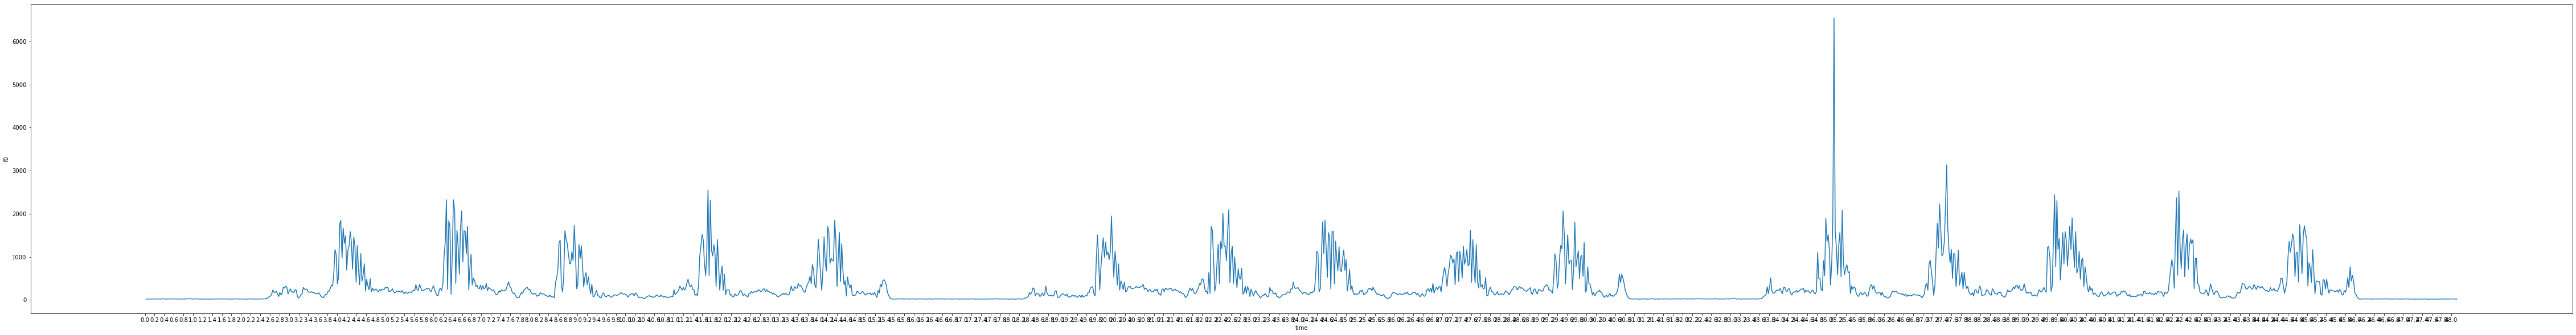

,Time(Seconds),Length(Seconds),Label(string)
0,3.9303,0.708821,action_2
1,6.20147,0.732725,action_2
2,8.5684,0.660119,action_2
3,11.5229,0.536781,action_2
4,13.9877,0.660495,action_2
5,19.7747,0.560642,action_2
6,22.167,0.58666,action_2
7,24.3651,0.608878,action_2
8,27.148,0.706371,action_2
9,29.3203,0.855232,action_2


In [24]:
a2_raw = pd.read_csv('action_2_signal_raw.data')
ts_labeling(raw_df=a2_raw , label='action_2')

In [25]:
pd.read_csv('action_2_labels.label')

,Time(Seconds),Length(Seconds),Label(string)
0,3.858300,0.829363,action_2
1,6.152149,0.756049,action_2
2,8.519394,0.733050,action_2
3,11.502387,0.557311,action_2
4,13.899071,0.772245,action_2
5,19.748720,0.611650,action_2
6,22.148544,0.703281,action_2
7,24.315997,0.780177,action_2
8,26.952032,0.928340,action_2
9,29.305949,0.771415,action_2
